In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('Datasets/PTEN_MCF10A_stability_ref_set_copy.csv', index_col=False)

In [3]:
df1.head(10)

,variant,stability,MCF10A score,ground_truth
0,T382S,0.012312,0.6353,0.0
1,I101T,0.069039,0.7138,0.0
2,Y155C,0.233436,0.5901,0.0
3,R173H,0.298885,0.2672,NaN
4,P246L,0.312412,0.6162,NaN
5,G129R,0.409884,0.8214,NaN
6,D326N,0.481578,0.7214,NaN
7,H93Q,0.489111,0.3301,NaN
8,C124R,0.608708,0.6986,NaN
9,K6E,0.657556,0.3311,NaN


# setting up training data

In [4]:
training_df = df1.dropna().copy()
X = training_df.iloc[:, 1:-1]
y = training_df[['ground_truth']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=0)

/Users/jessesnaust/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Apply logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
LR = LogisticRegression(class_weight='balanced',random_state=0, solver='liblinear').fit(
    X_train, y_train.values.ravel()) 

In [8]:
LR_pred = LR.predict(X_test)

In [9]:
# Predict confidence scores for samples.
LR.decision_function(X_test)

array([ 0.40257672,  0.87255656,  0.91295493,  0.57501662, -0.1938748 ])

In [10]:
print(LR_pred)

[1. 1. 1. 1. 0.]


In [11]:
print('The accuracy is {0:0.3f}'.format(accuracy_score(y_test, LR_pred)))

The accuracy is 1.000


In [12]:
LR_kfold_scores = cross_val_score(LR, X, y.values.ravel(), cv=5)
print(LR_kfold_scores, '\n')
print('The average cross-validation score is {0:0.3f}'.format(np.mean(LR_kfold_scores)))

[1. 1. 1. 1. 1.] 

The average cross-validation score is 1.000


/Users/jessesnaust/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [13]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [14]:
X_all = df1.iloc[:,1:-1]

In [15]:
LR_pred_all = LR.predict(X_all)

In [16]:
print(LR_pred_all)

[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
# inserting predictions back into dataset
df1['LR classification'] = LR_pred_all
print(df1.head())

  variant  stability  MCF10A score  ground_truth  LR classification
0   T382S   0.012312        0.6353           0.0                0.0
1   I101T   0.069039        0.7138           0.0                0.0
2   Y155C   0.233436        0.5901           0.0                0.0
3   R173H   0.298885        0.2672           NaN                0.0
4   P246L   0.312412        0.6162           NaN                0.0


In [18]:
df1.to_csv('Output Datasets/MCF10A_stability_LR_pred.csv', index=False)

# re-organizing dataset according to LR classifications

In [18]:
destabilized = []
stable = []
for i in range(len(df1)):
    LR_class = df1.iloc[i, -1]
    st_score = df1.iloc[i, 1]
    if LR_class == 0:
        destabilized.append(st_score)
    elif LR_class == 1:
        stable.append(st_score)

In [19]:
df_lr = pd.DataFrame()

df_lr['stable'] = stable

In [20]:
# need to make it a series so it will fill emtpy rows with NaN
df_lr.loc[:,'destabilized'] = pd.Series(destabilized)

In [21]:
df_lr

,stable,destabilized
0,0.481578,0.012312
1,0.489111,0.069039
2,0.608708,0.233436
3,0.657556,0.298885
4,0.695035,0.312412
5,0.683597,0.409884
6,0.710256,NaN
7,0.734818,NaN
8,0.743910,NaN
9,0.764422,NaN


In [25]:
print(df_lr.iloc[:,0].mean())
print(df_lr.iloc[:,1].mean())

0.890731259175
0.22266138466666666


# plotting the LR graph

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl

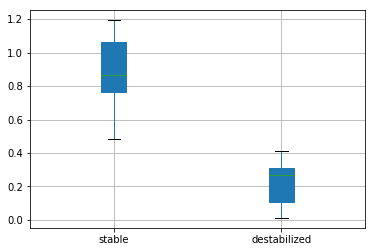

In [69]:
fig, ax = plt.subplots()
col_list = df_lr.columns.tolist()
boxplot = df_lr.boxplot(column=col_list, patch_artist=True)

# output figure
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/MCF10A_stability_LR.pdf', transparent=True, dpi=200)

plt.show()

# Apply SVM

In [ ]:
from sklearn import svm

In [ ]:
SVM = svm.SVC(gamma='scale', decision_function_shape='ovr')

In [ ]:
SVM.fit(X_train, y_train.values.ravel()) 
SVM_pred = SVM.predict(X_test)  

In [ ]:
scores = accuracy_score(y_test, SVM_pred)

In [ ]:
print(scores)

In [ ]:
print(classification_report(y_test, SVM_pred))

In [ ]:
print(SVM_pred)

In [ ]:
# perform 5-fold cross validation

kfold_scores = cross_val_score(SVM, X_vac14, y_.values.ravel(), cv=5)
print(kfold_scores)

In [ ]:
print(np.mean(kfold_scores))

# trying a different method

In [ ]:
# not using SDM aa properties for this method
training_df_2 = df_barry.iloc[:, 0:3]

In [ ]:
# how many entries have ground truth?
training_df_2.count()

In [ ]:
# how many variants with ground_truth=0?
training_df_2[training_df_2[['ground_truth']] == 0].count()

In [ ]:
training_df_2.dropna(inplace=True)

In [ ]:
X_2 = training_df_2.drop(['variant','ground_truth'], axis=1)
y_2 = training_df_2[['ground_truth']]

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = \
    train_test_split(X_2, y_2, train_size=0.6, random_state=0)

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_2, y_train_2.values.ravel())

In [ ]:
y_pred = svclassifier.predict(X_test_2)

In [ ]:
# evaluating performance
print(classification_report(y_test_2, y_pred))

In [ ]:
scores = accuracy_score(y_test_2, y_pred)
print(scores)

In [ ]:
print(y_pred)

In [ ]:
X_test_all = df_all[['vac14 score']]
y_pred_all = svclassifier.predict(X_test_all)

In [ ]:
print(y_pred_all)

In [ ]:
LR_2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000).fit(
    X_train_2, y_train_2.values.ravel()) 

LR_pred_2 = LR_2.predict(X_test_2)

In [ ]:
print(LR_pred)
print('\n')
print('The accuracy is {0:0.3f}'.format(accuracy_score(y_test, LR_pred)))
print('\n')
print(classification_report(y_test, LR_pred))

# visualizing results

In [ ]:
# visualizing sVM classification

# now generate a new df to plot heatmap
df_class = df[['SVM']].transpose()
df_class.columns = df.iloc[:,0]

print(df_class)

In [ ]:
# this will modify the range of the colormap by truncation
# https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [ ]:
# specify custom colormap
#cmap = colors.ListedColormap(['green','red','black','yellow'])

# generating figure
fig = plt.figure(figsize=(7,5), dpi=200)
ax = fig.add_subplot(111)

# getting custom colors
cmap = plt.get_cmap('Reds') 
new_cmap = truncate_colormap(cmap, 0.0, 0.69)

#plotting
im = ax.imshow(df_class, cmap=new_cmap)
    
# set the ticks...
ax.set_xticks(np.arange(len(df_class.columns)))
ax.set_yticks(np.arange(1))
    
# label the ticks
ax.set_xticklabels(df_class.columns, fontsize=6, rotation=90)
ax.set_yticklabels(list(df_class.index), fontsize=6)
 
# set white grids
ax.set_xticks(np.arange(len(df_class.columns)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.4)
ax.tick_params(which="minor", bottom=False, left=False)
    
# set the title
ax.set_title('classification of MCF10A scores')

# add colorbar
cbar = ax.figure.colorbar(im, cax = fig.add_axes([0.92, 0.45, 0.01, 0.1]))
cbar.ax.tick_params(labelsize=6)

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/MCF10A_classifications_SVM.pdf', transparent=True)

plt.show()

In [ ]:
df.to_csv('Output Datasets/MCF10A scores_SVM_classification.csv', index=False)